# How RNNs Work for Prompt Generation

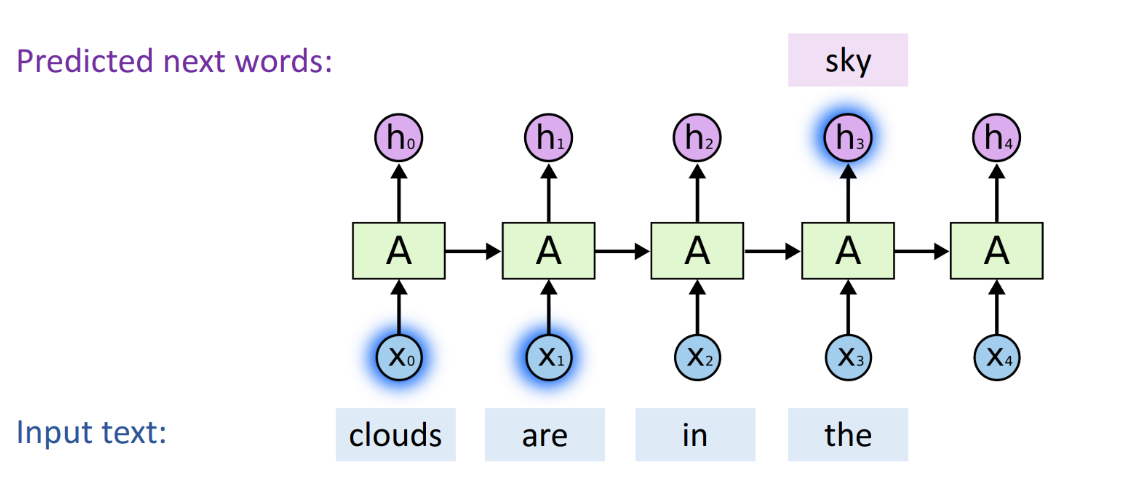

### Sequential Data Handling:

RNNs are designed to handle sequential data, like sentences or text. They process one word (or token) at a time and retain a "memory" of previous words to inform the generation of the next word. This makes them suitable for tasks like text generation, including prompt generation.
Training on Text Data:

To generate prompts, an RNN can be trained on a large dataset of text, such as books, articles, or dialogues. The model learns the patterns in the data, including grammar, sentence structure, and context.
### Generating Text:

Once trained, the RNN can generate text by predicting the next word in a sequence based on the previous words. For prompt generation, you might start with a seed text (a few words or a sentence) and let the RNN generate the rest of the text, creating a coherent and contextually relevant prompt.
Limitations and Alternatives
### While RNNs have been used for text generation, they have some limitations:

Long-Term Dependencies: RNNs struggle with long-term dependencies due to the vanishing gradient problem, making it hard for them to generate coherent long prompts if the context is too far back.
Quality of Generated Text: RNN-generated text can sometimes be repetitive or lack coherence, especially if not trained on a sufficiently large and diverse dataset.

# Step 1: Setting Up the Environment

# Step 2: Importing Necessary Libraries

We will use TensorFlow and PyTorch, popular AI frameworks used for developing machine learning models. 

These frameworks provide a comprehensive set of tools that enable developers to easily create and deploy ML models.

torch is imported to ensure we have access to all necessary PyTorch functions and classes.

torch.nn is aliased as nn for ease of use.

The RNNModel class extends nn.Module, which is the base class for all neural network modules in PyTorch.

The forward method is where the input tensor x goes through the layers of the network.

To actually run this, you'll need to install PyTorch if it's 
not already available in your session.

!pip install torch

After importing the necessary libraries and defining your model, 
you'll be ready to instantiate the RNNModel class and use it for whatever task you have in mind, such as text generation or another sequence modeling task.

In [1]:
import tensorflow as tf
import torch
import torch.nn as nn

# Step 3: Gathering and Preprocessing Data

The first step in building a language model is to gather and preprocess the data. 

The data for a language model is typically a large corpus of text. 

For example, you could use a book, a collection of articles, or any other large text file.

https://www.mltut.com/how-to-build-generative-ai-model/ 



Once you have your text data, you'll need to preprocess it. This typically involves:

* Tokenization: Splitting the text into individual words or tokens.
* Lowercasing: Converting all the text to lowercase to ensure the model doesn't treat the same word in different cases as different words.
* Removing punctuation and non-alphanumeric characters: This simplifies the model's input space.

In Python, **import re** is a statement that allows you to use the **regular expression (regex) module**. Regular expressions are powerful tools for pattern matching and manipulation of strings. **The re module provides functions and methods that enable you to work with regular expressions in Python**

In [2]:
import re

# Step 4: Building the Model

We will use a Recurrent Neural Network (RNN) for our language model. 

RNNs are great for generating sequences, like sentences or melodies.

This is a Python function named preprocess_text that takes a text input as a parameter and performs several preprocessing steps on it. The purpose of such preprocessing is often to clean and standardize the text data before further analysis, such as natural language processing or machine learning tasks.

Let's break down the function:

**text = text.lower(): This line converts all characters in the text to lowercase. This is done to ensure uniformity and avoid the distinction between uppercase and lowercase characters during subsequent processing.**

**text = re.sub(r'\d+', '', text): This line uses the re.sub function from the re module to replace all sequences of digits (\d+) in the text with an empty string. In other words, it removes all numerical digits from the text.**

**text = re.sub(r'\s+', ' ', text): This line replaces one or more whitespace characters (\s+) with a single space (' '). It helps to normalize the spacing in the text, reducing multiple consecutive spaces to just one.**

**text = re.sub(r'\W', ' ', text): This line replaces all non-alphanumeric characters (\W) with a single space (' '). It effectively removes any special characters, leaving only words and spaces in the text.**

**Finally, the preprocessed text is returned.**

In summary, the preprocess_text function is a simple text cleaning function that lowers the text case, removes numerical digits, standardizes whitespace, and replaces non-alphanumeric characters with spaces. It's a common set of preprocessing steps used to prepare text data for various natural language processing tasks. Note that for the regular expressions used in the re.sub calls, \d represents any digit, \s represents any whitespace character, and \W represents any non-alphanumeric character.

In [3]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\W', ' ', text)
    return text

1. First class line declares a class named RNNModel that inherits from nn.Module, which is a base class for all PyTorch neural network modules.
2. The __init__ method initializes the RNNModel. It takes four parameters:

- vocab_size: The size of the vocabulary (number of unique words).
- embed_size: The size of the word embeddings.
- hidden_size: The number of features in the hidden state of the RNN.
- num_layers: The number of RNN layers.

It then calls the constructor of the parent class (nn.Module) using super()

3. MOdel components are:
- self.embed: An embedding layer that converts input indices (word IDs) into dense vectors of fixed size (embed_size).
- self.rnn: An RNN layer with num_layers layers, taking input of size embed_size and producing a hidden state of size hidden_size.
- self.linear: A linear layer that maps the RNN hidden state to the output vocabulary size (vocab_size).

4. The forward method defines the forward pass of the model. It takes two parameters:

- x: Input sequence (word indices).
- h: Initial hidden state of the RNN.

The forward pass involves the following steps:

Embedding the input sequence (x) using the embedding layer.
Passing the embedded sequence through the RNN, producing an output tensor (out) and an updated hidden state (h).
Applying the linear layer to the RNN output to get the final prediction.
The method returns the output tensor and the updated hidden state.



In [4]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x, h):
        x = self.embed(x)
        out, h = self.rnn(x, h)
        out = self.linear(out)
        return out, h

In summary, this code defines a basic RNN model for language modeling or sequence prediction tasks, where the goal is to predict the next word in a sequence given the previous words.

# Step 5: Training the Model

Training involves feeding your preprocessed data into the model, calculating the error of the model's predictions, and updating the model's parameters to reduce this error. 

This process is repeated for a number of iterations or epochs5.

The Adam optimizer is a popular optimization algorithm used in machine learning and deep learning for training artificial neural networks. It stands for Adaptive Moment Estimation and is designed to combine the advantages of two other optimization algorithms: RMSprop (Root Mean Square Propagation) and Momentum.

The Adam optimizer maintains two moving averages for each parameter in the network: the first moment (mean) and the second moment (uncentered variance). These moving averages are used to adaptively adjust the learning rates during training. The algorithm computes exponential moving averages of the gradient and the squared gradient of the parameters.

The update rule for the Adam optimizer is given by the following equations:

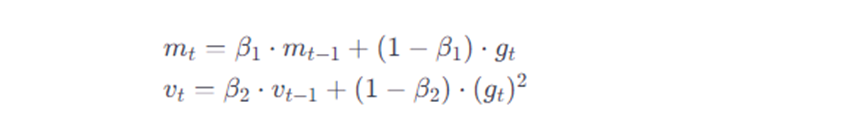

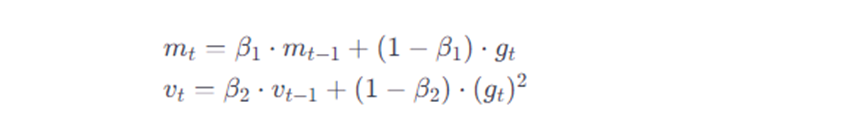
After computing the moving averages, the parameters are updated as follows:

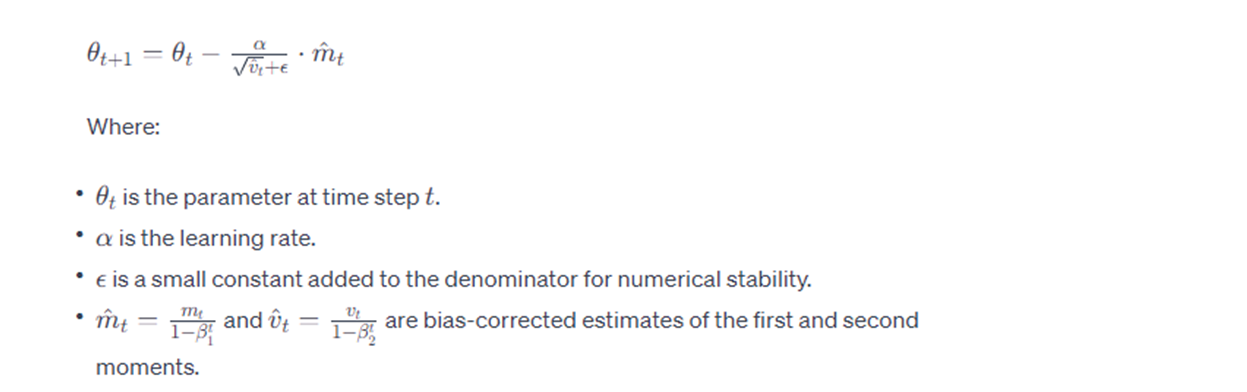

Adam has been widely adopted in the deep learning community due to its robustness, efficiency, and good performance on a variety of tasks. It helps overcome some challenges associated with traditional optimization methods, such as setting a global learning rate and dealing with sparse gradients.

In [5]:
def train(model, data, epochs, lr):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        hidden = None
        for x, y in data:
            optimizer.zero_grad()
            outputs, hidden = model(x, hidden)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

# Step 6: Using the Model for Inference [Doing the next token generation]

Once the model is trained, you can use it to generate new text. 

This involves:


Providing the model with a seed sequence

Having the model make a prediction for the next word

Adding the predicted word to the sequence

Repeating this process for as many words as you want to generate

Below code says:-
    
1. Function signature

  The function is defined with three parameters:

- model: The PyTorch model used for text generation.
- seed_text: A starting sequence of text from which the generation begins.
- num_words: The number of words to generate.

2. Set Model to Evaluation Mode:

    model.eval()

This line sets the model to evaluation mode. In PyTorch, this is important because it disables certain operations like dropout, which are typically used during training but not during evaluation or generation.

3. Initialize Text:

    text = seed_text
    
The text variable is initialized with the provided seed_text. This will be the starting point for text generation.

4. Generate Text:


    for _ in range(num_words):
        x = torch.tensor([text[-1]])
        output, _ = model(x, None)
        _, predicted = torch.max(output, 1)
        text.append(predicted.item())
        
        
Inside the loop, a tensor x is created with the last word of the current text (text[-1]). This tensor is then passed to the model.
The model's forward pass is executed (model(x, None)), and the output tensor (output) is obtained. The second return value (_) represents the hidden state, which is not used here (None is passed).

The torch.max function is used to get the index of the word with the highest probability in the output distribution. This index (predicted) is added to the text as the next predicted word.

5. Return Generated Text:

    return text
    
After generating the specified number of words, the function returns the complete generated text.

In [6]:
def generate_text(model, seed_text, num_words):
    model.eval()
    text = seed_text
    for _ in range(num_words):
        x = torch.tensor([text[-1]])
        output, _ = model(x, None)
        _, predicted = torch.max(output, 1)
        text.append(predicted.item())
    return text

In summary, this function takes a trained model, a seed text, and a number of words to generate. It utilizes the model to predict the next word in the sequence iteratively, updating the text with each prediction, and finally returns the generated text.

# Step 7: Interacting with the Model

You will interact with your trained model by providing it with a seed sequence {prompt engineering} and having it generate a response. This can be done in a loop to simulate a conversation with the model5.

Simple learning guide on creating and training a generative language model using Python, focusing on Transformers-based library called GPT-2. This model has been well noted for its ability in generating coherent and contextually relevant sentences based on a given prompt.

# Step 8: Importing the Model and Tokenizer

In [7]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

C:\Users\monika201103\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\monika201103\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


# Step 9: Encoding and Decoding Functions

These two functions are related to text encoding and decoding using the **Hugging Face Transformers library**. This library is commonly used for natural language processing tasks, including pre-trained models like BERT, GPT, etc. The provided functions are specifically designed to work with a tokenizer provided by this library.

Here's a breakdown of each function:

**encode function:**

def encode(prompt):
    return tokenizer.encode(prompt, return_tensors="pt")
    
This function takes a prompt as input, which is a piece of text or a sentence.
It uses the Hugging Face tokenizer to encode the text. The encode method of the tokenizer converts the input text into a sequence of numerical IDs (usually representing subword tokens).

The return_tensors="pt" argument specifies that the function should return a PyTorch tensor. This is useful when working with PyTorch-based models.

In [8]:
def encode(prompt):
    return tokenizer.encode(prompt, return_tensors="pt")

def decode(encoded_prompt):
    return tokenizer.decode(encoded_prompt[0], skip_special_tokens=True)

**decode function:

def decode(encoded_prompt):
    return tokenizer.decode(encoded_prompt[0], skip_special_tokens=True)

This function takes an encoded_prompt as input, which is the result of the encoding process (a tensor of numerical IDs).
It uses the Hugging Face tokenizer again, this time with the decode method. This method converts the numerical IDs back into human-readable text.
The skip_special_tokens=True argument instructs the tokenizer to exclude any special tokens (e.g., [CLS], [SEP]) that might have been added during the encoding process.

In summary, these functions provide a convenient way to encode and decode text using the Hugging Face Transformers library's tokenizer. They are particularly useful when working with models that require input in a numerical format (encoded) and when you want to convert the model's output back into human-readable text (decoded).

# Step 10: Running The Model

Now for the fun part: generating text!

Inputs and outputs to the GPT2 model are all sequences of integers. We can encode our input prompt, generate a response, and then decode this response to get our output message:


# input prompt encoded

The encode function is assumed to encode the input prompt into a format suitable for the language model. This is a common step when working with neural language models, as the models typically operate on numerical representations of text rather than the raw text itself.

# output

The model.generate function is used to generate text based on the encoded input prompt. It takes the encoded prompt, specifies a maximum length for the generated text (500 tokens in this case), and requests the generation of two sequences (num_return_sequences=2). Other parameters such as no_repeat_ngram_size and do_sample are used to control the diversity and characteristics of the generated text.

# output_message: 

The generated text sequences are then decoded back into human-readable text using a decode function. This is necessary because the model operates on numerical representations, and decoding is required to convert the model's output back into natural language.

print(output_message): Finally, the decoded output is printed to the console, presumably to display the generated text.

In [23]:
input_prompt = "How are you feeling today?"

input_prompt_encoded = encode(input_prompt) 
output = model.generate(input_prompt_encoded, max_length=50, num_return_sequences=1, no_repeat_ngram_size=2, do_sample=True)
output_message = decode(output)

print(output_message)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


How are you feeling today? That's not going to get anyone's attention. But I know, it's cool to know. If you look at your other teammates, who really play for teams, what they're all doing, that's an example


In [24]:
input_prompt_encoded

tensor([[2437,  389,  345, 4203, 1909,   30]])

In [25]:
output

tensor([[ 2437,   389,   345,  4203,  1909,    30,  1320,   338,   407,  1016,
           284,   651,  2687,   338,  3241,    13,   887,   314,   760,    11,
           340,   338,  3608,   284,   760,    13,  1002,   345,   804,   379,
           534,   584, 13107,    11,   508,  1107,   711,   329,  3466,    11,
           644,   484,   821,   477,  1804,    11,   326,   338,   281,  1672]])

# Step 10: Create a conversational model

**A conversational model** is a type of natural language processing (NLP) model designed to understand and generate human-like responses in the context of a conversation. These models are often built using techniques from machine learning and deep learning and can be used for various applications, including chatbots, virtual assistants, and other interactive systems.

For creating a conversational model, one needs to append the prompt to all previous dialogue.

# Explaination

**history_encoded:** This variable represents the encoded version of the initial conversation history. The tokenizer.encode function is used to convert the text into a numerical representation suitable for the language model, and return_tensors="pt" specifies that the result should be in PyTorch tensor format.

**user_input_encoded:** This variable represents the encoded version of the user's input. Using the same tokenizer.encode approach, it converts the user's input into a numerical representation.

**history_with_user_input_encoded:** The code concatenates the encoded history and the encoded user input along the last dimension (dim=-1). This combined tensor serves as the updated conversation history that includes the user's latest input.

**output:** The model.generate function is then used to generate a response based on the updated conversation history. It specifies parameters such as the maximum length of the generated text (max_length=100), the number of sequences to generate (num_return_sequences=1), and other generation settings.

**history_with_reply_encoded:** The variable history_with_reply_encoded is assigned the value of the generated output. This is essentially updating the conversation history with the model's response.

**output_message:** The generated response is then decoded back into human-readable text using a decode function. The exact details of the decoding process are not provided in the code snippet, but it is assumed that there's a corresponding decode function that converts the model's output into natural language.

**print(output_message):** Finally, the decoded response is printed to the console, allowing you to see the model's generated message in the conversation.

In [26]:
# conversation history
history_encoded = tokenizer.encode("Hello, I'm an AI model. ", return_tensors="pt")

# user input
user_input_encoded = tokenizer.encode("Hello, how are you?", return_tensors="pt")

# append the new user input tokens to the chat history
history_with_user_input_encoded = torch.cat([history_encoded, user_input_encoded], dim=-1)

# generate a response
output = model.generate(history_with_user_input_encoded, max_length=50, num_return_sequences=1, no_repeat_ngram_size=2, do_sample=True)

history_with_reply_encoded = output

# Print message
output_message = decode(history_with_reply_encoded)
print(output_message)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hello, I'm an AI model. Hello, how are you? It's really nice to meet you, but I wouldn't want to waste my time trying to make you look different from the original. Well here we are. We're a


In [27]:
history_with_user_input_encoded

tensor([[15496,    11,   314,  1101,   281,  9552,  2746,    13,   220, 15496,
            11,   703,   389,   345,    30]])

In [28]:
history_encoded

tensor([[15496,    11,   314,  1101,   281,  9552,  2746,    13,   220]])

In [29]:
user_input_encoded

tensor([[15496,    11,   703,   389,   345,    30]])